# Tarea 2
c) Los proyectos reales no sólo se componen de actividades que se deben cumpir, sino que también de recursos limiados que se deben compartir. Además, pueden haber reglas específicas para la asignación de dichos recursos. Implemente un procedimiento que permita implementar recursos compartidos entre actividades.

In [10]:
import random
import matplotlib.pyplot as plt
import simpy
import networkx as nx   

In [29]:
class ActivityProcess_wR(object):
    def __init__(self, env, name, tolba):
        self.env = env
        self.name = name
        self.tolba = tolba
        
    def waitup(self,node, myEvent):
        # PEM illustrating "waitevent"# wait for "myEvent" to occur
        evnt = [e.event for e in myEvent]
        yield self.env.all_of(evnt)
        with self.tolba.request() as req:
            print("%s is requesting tolba at time %f" %(self.name, self.env.now))
            yield req
            
            print("The activating event(s) were %s at time %f" %([x.name for x in myEvent],self.env.now))
            tis = random.expovariate(1.0)
            yield self.env.timeout(tis)
            finishtime = self.env.now
            if finishtime > SANglobal.finishtime:
                SANglobal.finishtime = finishtime
            SANglobal.F.nodecomplete[node].event.succeed()

In [12]:
class ActivityProcess(object):
    def __init__(self, env, name):
        self.env = env
        self.name = name
        
    def waitup(self,node, myEvent):
        # PEM illustrating "waitevent"# wait for "myEvent" to occur
        evnt = [e.event for e in myEvent]
        yield self.env.all_of(evnt)
        print("The activating event(s) were %s and time %f" %([x.name for x in myEvent], self.env.now))
        tis = random.expovariate(1.0)
        yield self.env.timeout(tis)
        finishtime = self.env.now
        if finishtime > SANglobal.finishtime:
            SANglobal.finishtime = finishtime
        SANglobal.F.nodecomplete[node].event.succeed()

In [13]:
class StartSignaller(object):
    # here we just schedule some events to fire
    def __init__(self, env, name, sEvent):
        self.env = env
        self.name = name
        self.sEvent = sEvent
        self.env.process(self.startSignals())
        
    def startSignals(self):
        yield self.env.timeout(0)
        self.sEvent.event.succeed()

In [14]:
class CustomEvent(object):
    def __init__(self,env, name):
        self.name = name
        self.env = env
        self.event = self.env.event()        

Vamos a modificar el grafo para que b y c no dependan el uno del otro y pidan el mismo recurso, y para hacerlo más interesante agregaremos otro nodo, que sólo necesita el recurso y depende de `a`, que llamaremos muy originalmente `e`.

In [16]:
class SANglobal:
    F = nx.DiGraph()
    a = 0
    b = 1
    c = 2
    d = 3
    e = 4
    inTo = 0
    F.add_nodes_from([a, b, c, d, e])
    F.add_edges_from([(a,b), (a,c), (b,d), (c,d), (a,e)])
    finishtime = 0
    recurso = (b,d,e)

Lo gráficamos

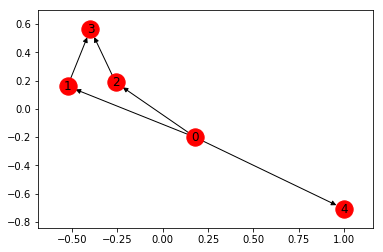

In [20]:
nx.draw_networkx(SANglobal.F)
plt.show()

In [27]:
finishtimes = []
for rep in range(1000):
    SANglobal.finishtime = 0
    env = simpy.Environment() #ambiente de simpy creado
    tolba = simpy.Resource(env, capacity=1) #Creamos nuestro recurso tolba con capacidad 1
    
    SANglobal.F.nodecomplete= []
    for i in range(len(SANglobal.F.nodes())):
        eventname = 'Complete %1d' % i
        SANglobal.F.nodecomplete.append(CustomEvent(env,eventname))
    #SANglobal.F.nodecomplete

    activitynode = []
    for i in range(len(SANglobal.F.nodes())):
        activityname = 'Activity %1d' % i
        if i in SANglobal.recurso:
            activitynode.append(ActivityProcess_wR(env,activityname,tolba))
        else:
            activitynode.append(ActivityProcess(env,activityname))
        
    for i in range(len(SANglobal.F.nodes())):
        if i is not SANglobal.inTo:
            prenodes = SANglobal.F.predecessors(i)
            preevents = [SANglobal.F.nodecomplete[j] for j in prenodes]
            env.process(activitynode[i].waitup(i,preevents))
            
    startevent = CustomEvent(env,'Start')
    sstart = StartSignaller(env,'Signal',startevent).startSignals()
    env.process(activitynode[SANglobal.inTo].waitup(SANglobal.inTo, [startevent]))
    
    env.run(until=50)
    finishtimes.append(SANglobal.finishtime)

The activating event(s) were ['Start'] and time 0.000000
Activity Activity 1 is requesting tolba at time 0.000274
The activating event(s) were ['Complete 0'] and time 0.000274
Activity Activity 4 is requesting tolba at time 0.000274
The activating event(s) were ['Complete 0'] at time 0.000274
Activity Activity 3 is requesting tolba at time 0.070820
The activating event(s) were ['Complete 0'] at time 0.070820
The activating event(s) were ['Complete 1', 'Complete 2'] at time 0.918774
The activating event(s) were ['Start'] and time 0.000000
Activity Activity 1 is requesting tolba at time 0.346750
The activating event(s) were ['Complete 0'] and time 0.346750
Activity Activity 4 is requesting tolba at time 0.346750
The activating event(s) were ['Complete 0'] at time 0.346750
The activating event(s) were ['Complete 0'] at time 1.310722
Activity Activity 3 is requesting tolba at time 3.094589
The activating event(s) were ['Complete 1', 'Complete 2'] at time 3.094589
The activating event(s) we

The activating event(s) were ['Start'] and time 0.000000
Activity Activity 1 is requesting tolba at time 1.600181
The activating event(s) were ['Complete 0'] and time 1.600181
Activity Activity 4 is requesting tolba at time 1.600181
The activating event(s) were ['Complete 0'] at time 1.600181
The activating event(s) were ['Complete 0'] at time 3.044418
Activity Activity 3 is requesting tolba at time 3.190301
The activating event(s) were ['Complete 1', 'Complete 2'] at time 3.342767
The activating event(s) were ['Start'] and time 0.000000
Activity Activity 1 is requesting tolba at time 1.056036
The activating event(s) were ['Complete 0'] and time 1.056036
Activity Activity 4 is requesting tolba at time 1.056036
The activating event(s) were ['Complete 0'] at time 1.056036
Activity Activity 3 is requesting tolba at time 3.678830
The activating event(s) were ['Complete 0'] at time 3.678830
The activating event(s) were ['Complete 1', 'Complete 2'] at time 4.153315
The activating event(s) we

Activity Activity 3 is requesting tolba at time 1.456889
The activating event(s) were ['Complete 0'] at time 1.456889
The activating event(s) were ['Complete 1', 'Complete 2'] at time 4.947202
The activating event(s) were ['Start'] and time 0.000000
Activity Activity 1 is requesting tolba at time 0.901962
The activating event(s) were ['Complete 0'] and time 0.901962
Activity Activity 4 is requesting tolba at time 0.901962
The activating event(s) were ['Complete 0'] at time 0.901962
The activating event(s) were ['Complete 0'] at time 1.617065
Activity Activity 3 is requesting tolba at time 2.289974
The activating event(s) were ['Complete 1', 'Complete 2'] at time 2.289974
The activating event(s) were ['Start'] and time 0.000000
Activity Activity 1 is requesting tolba at time 0.741028
The activating event(s) were ['Complete 0'] and time 0.741028
Activity Activity 4 is requesting tolba at time 0.741028
The activating event(s) were ['Complete 0'] at time 0.741028
The activating event(s) we

Activity Activity 4 is requesting tolba at time 0.737459
The activating event(s) were ['Complete 0'] at time 0.737459
Activity Activity 3 is requesting tolba at time 1.743961
The activating event(s) were ['Complete 0'] at time 1.743961
The activating event(s) were ['Complete 1', 'Complete 2'] at time 2.047370
The activating event(s) were ['Start'] and time 0.000000
Activity Activity 1 is requesting tolba at time 0.495928
The activating event(s) were ['Complete 0'] and time 0.495928
Activity Activity 4 is requesting tolba at time 0.495928
The activating event(s) were ['Complete 0'] at time 0.495928
The activating event(s) were ['Complete 0'] at time 1.007856
Activity Activity 3 is requesting tolba at time 1.203129
The activating event(s) were ['Complete 1', 'Complete 2'] at time 1.203129
The activating event(s) were ['Start'] and time 0.000000
Activity Activity 1 is requesting tolba at time 0.138480
The activating event(s) were ['Complete 0'] and time 0.138480
Activity Activity 4 is req

The activating event(s) were ['Complete 1', 'Complete 2'] at time 1.457820
The activating event(s) were ['Start'] and time 0.000000
Activity Activity 1 is requesting tolba at time 2.731546
The activating event(s) were ['Complete 0'] and time 2.731546
Activity Activity 4 is requesting tolba at time 2.731546
The activating event(s) were ['Complete 0'] at time 2.731546
Activity Activity 3 is requesting tolba at time 3.630728
The activating event(s) were ['Complete 0'] at time 3.630728
The activating event(s) were ['Complete 1', 'Complete 2'] at time 3.977000
The activating event(s) were ['Start'] and time 0.000000
Activity Activity 1 is requesting tolba at time 0.234830
The activating event(s) were ['Complete 0'] and time 0.234830
Activity Activity 4 is requesting tolba at time 0.234830
The activating event(s) were ['Complete 0'] at time 0.234830
Activity Activity 3 is requesting tolba at time 1.672221
The activating event(s) were ['Complete 0'] at time 1.672221
The activating event(s) we

The activating event(s) were ['Start'] and time 0.000000
Activity Activity 1 is requesting tolba at time 0.285050
The activating event(s) were ['Complete 0'] and time 0.285050
Activity Activity 4 is requesting tolba at time 0.285050
The activating event(s) were ['Complete 0'] at time 0.285050
Activity Activity 3 is requesting tolba at time 1.067310
The activating event(s) were ['Complete 0'] at time 1.067310
The activating event(s) were ['Complete 1', 'Complete 2'] at time 1.314526
The activating event(s) were ['Start'] and time 0.000000
Activity Activity 1 is requesting tolba at time 4.592151
The activating event(s) were ['Complete 0'] and time 4.592151
Activity Activity 4 is requesting tolba at time 4.592151
The activating event(s) were ['Complete 0'] at time 4.592151
The activating event(s) were ['Complete 0'] at time 4.891140
Activity Activity 3 is requesting tolba at time 4.907160
The activating event(s) were ['Complete 1', 'Complete 2'] at time 9.384722
The activating event(s) we

The activating event(s) were ['Complete 0'] and time 1.520744
Activity Activity 4 is requesting tolba at time 1.520744
The activating event(s) were ['Complete 0'] at time 1.520744
The activating event(s) were ['Complete 0'] at time 2.578478
Activity Activity 3 is requesting tolba at time 3.319511
The activating event(s) were ['Complete 1', 'Complete 2'] at time 5.078913
The activating event(s) were ['Start'] and time 0.000000
Activity Activity 1 is requesting tolba at time 0.773151
The activating event(s) were ['Complete 0'] and time 0.773151
Activity Activity 4 is requesting tolba at time 0.773151
The activating event(s) were ['Complete 0'] at time 0.773151
Activity Activity 3 is requesting tolba at time 3.631260
The activating event(s) were ['Complete 0'] at time 3.631260
The activating event(s) were ['Complete 1', 'Complete 2'] at time 4.717390
The activating event(s) were ['Start'] and time 0.000000
Activity Activity 1 is requesting tolba at time 0.954865
The activating event(s) we

The activating event(s) were ['Start'] and time 0.000000
Activity Activity 1 is requesting tolba at time 0.458570
The activating event(s) were ['Complete 0'] and time 0.458570
Activity Activity 4 is requesting tolba at time 0.458570
The activating event(s) were ['Complete 0'] at time 0.458570
The activating event(s) were ['Complete 0'] at time 0.804852
Activity Activity 3 is requesting tolba at time 2.223883
The activating event(s) were ['Complete 1', 'Complete 2'] at time 2.223883
The activating event(s) were ['Start'] and time 0.000000
Activity Activity 1 is requesting tolba at time 0.893896
The activating event(s) were ['Complete 0'] and time 0.893896
Activity Activity 4 is requesting tolba at time 0.893896
The activating event(s) were ['Complete 0'] at time 0.893896
The activating event(s) were ['Complete 0'] at time 1.191495
Activity Activity 3 is requesting tolba at time 1.512459
The activating event(s) were ['Complete 1', 'Complete 2'] at time 4.445938
The activating event(s) we

The activating event(s) were ['Complete 0'] and time 0.088403
Activity Activity 4 is requesting tolba at time 0.088403
The activating event(s) were ['Complete 0'] at time 0.088403
Activity Activity 3 is requesting tolba at time 0.426681
The activating event(s) were ['Complete 0'] at time 0.426681
The activating event(s) were ['Complete 1', 'Complete 2'] at time 1.145706
The activating event(s) were ['Start'] and time 0.000000
Activity Activity 1 is requesting tolba at time 0.626961
The activating event(s) were ['Complete 0'] and time 0.626961
Activity Activity 4 is requesting tolba at time 0.626961
The activating event(s) were ['Complete 0'] at time 0.626961
Activity Activity 3 is requesting tolba at time 2.468172
The activating event(s) were ['Complete 0'] at time 2.468172
The activating event(s) were ['Complete 1', 'Complete 2'] at time 2.768435
The activating event(s) were ['Start'] and time 0.000000
Activity Activity 1 is requesting tolba at time 1.238442
The activating event(s) we

The activating event(s) were ['Start'] and time 0.000000
Activity Activity 1 is requesting tolba at time 0.319191
The activating event(s) were ['Complete 0'] and time 0.319191
Activity Activity 4 is requesting tolba at time 0.319191
The activating event(s) were ['Complete 0'] at time 0.319191
The activating event(s) were ['Complete 0'] at time 1.422484
Activity Activity 3 is requesting tolba at time 1.904941
The activating event(s) were ['Complete 1', 'Complete 2'] at time 2.463716
The activating event(s) were ['Start'] and time 0.000000
Activity Activity 1 is requesting tolba at time 3.651804
The activating event(s) were ['Complete 0'] and time 3.651804
Activity Activity 4 is requesting tolba at time 3.651804
The activating event(s) were ['Complete 0'] at time 3.651804
Activity Activity 3 is requesting tolba at time 5.993844
The activating event(s) were ['Complete 0'] at time 5.993844
The activating event(s) were ['Complete 1', 'Complete 2'] at time 6.106953
The activating event(s) we

The activating event(s) were ['Start'] and time 0.000000
Activity Activity 1 is requesting tolba at time 0.792036
The activating event(s) were ['Complete 0'] and time 0.792036
Activity Activity 4 is requesting tolba at time 0.792036
The activating event(s) were ['Complete 0'] at time 0.792036
Activity Activity 3 is requesting tolba at time 1.332167
The activating event(s) were ['Complete 0'] at time 1.332167
The activating event(s) were ['Complete 1', 'Complete 2'] at time 1.752055
The activating event(s) were ['Start'] and time 0.000000
Activity Activity 1 is requesting tolba at time 0.879542
The activating event(s) were ['Complete 0'] and time 0.879542
Activity Activity 4 is requesting tolba at time 0.879542
The activating event(s) were ['Complete 0'] at time 0.879542
The activating event(s) were ['Complete 0'] at time 1.330659
Activity Activity 3 is requesting tolba at time 1.617962
The activating event(s) were ['Complete 1', 'Complete 2'] at time 2.136445
The activating event(s) we

<function matplotlib.pyplot.show>

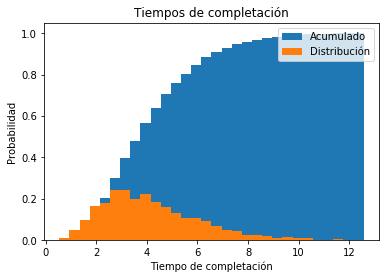

In [30]:
plt.hist(finishtimes, bins = 30, density = True, cumulative=True,label='Acumulado')  
plt.hist(finishtimes, bins = 30, density = True, cumulative=False,label='Distribución')
plt.title('Tiempos de completación')
plt.ylabel('Probabilidad')
plt.xlabel("Tiempo de completación")
plt.legend(loc='upper right')
plt.show